# DETR Tutorial

This notebook provides a tutorial for running inference on a static image in order to detect objects, as well as
panoptic segmentation.
The implementation of the [DetrLearner](../../../../docs/reference/detr.md) is largely copied from its original
[implementation](https://github.com/facebookresearch/detr).
More information on modifications and license can be found
[here](../../../../src/opendr/perception/object_detection_2d/detr/README.md).

First, we need to import the learner and initialize it:

In [1]:
from opendr.perception.object_detection_2d import DetrLearner

learner = DetrLearner(device='cuda', backbone='resnet101', threshold=0.7)

Note that we can alter the device (e.g., 'cpu', 'cuda', etc.), on which the model runs, as well as the backbone
architecture ('resnet50' or 'resnet101') and the threshold for detection.

After creating our model, we need to download pre-trained weights, which are loaded automatically:

In [2]:
learner.download(path=".")

Using cache found in ./detr_default/facebookresearch_detr_master


We will also download one sample image for testing:

In [3]:
import urllib
import numpy as np
import cv2

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)


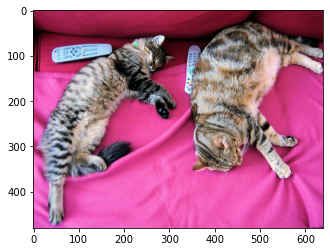

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


We are now ready to use our model!
The only thing that we have to do is to pass the image through the model.
Note that there are standard data types supported by OpenDR.
However, OpenDR also understands common data types (e.g,. OpenCV images) and automatically converts them into the most
appropriate format:

In [5]:
detections = learner.infer(img)

/home/jelle/anaconda3/envs/opendr/lib/python3.6/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /opt/conda/conda-bld/pytorch_1631630866422/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


We can plot the results using a utility function from the DETR module:

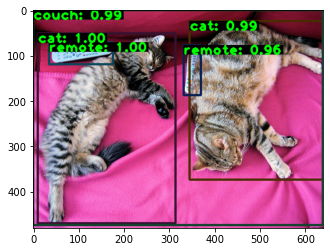

In [6]:
from opendr.perception.object_detection_2d.detr.algorithm.util.draw import draw

img_annotated = draw(img, detections, make_copy=True)

%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img_annotated, cv2.COLOR_BGR2RGB))

We can also perform panoptic segmentation with the DetrLearner.
For this, we need to set the *panoptic_segmentation* argument to *True*.
We do need to modify the number of classes for panoptic segmentation, since the pretrained model is trained with 250
classes.

In [7]:
learner = DetrLearner(device='cuda', num_classes = 250, panoptic_segmentation=True)

Again, we download a pretrained model and perform inference on the image:

In [8]:
learner.download()
detections = learner.infer(img)

Using cache found in temp/detr_default/facebookresearch_detr_master
/home/jelle/anaconda3/envs/opendr/lib/python3.6/site-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


And we can plot the results again with the same utility function as before:

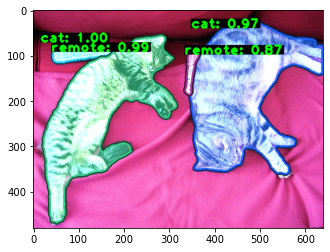

In [9]:
img_annotated = draw(img, detections, make_copy=True)

%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img_annotated, cv2.COLOR_BGR2RGB))